# 4 - Edge builder test

This notebook is using the final edge builder function from `src/functions.py` to build the edges for testing purposes. The full graph with the edges is plotted using matplotlib.

In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn

In [2]:
filename = "ntuples_13723003_0.root"
file = uproot.open(filename)

In [3]:
tracksters = file["ticlNtuplizer/tracksters"]

In [4]:
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()

In [5]:
vertices_indexes_0 = vertices_indexes[0]
vertices_x_0 = vertices_x[0]
vertices_y_0 = vertices_y[0]
vertices_z_0 = vertices_z[0]
vertices_E_0 = vertices_E[0]

In [6]:
edges_0 = fn.edgeBuilderNNTr(
    vertices_indexes_0, 
    vertices_x_0, 
    vertices_y_0, 
    vertices_z_0, 
    vertices_E_0
)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm
import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

<IPython.core.display.Javascript object>


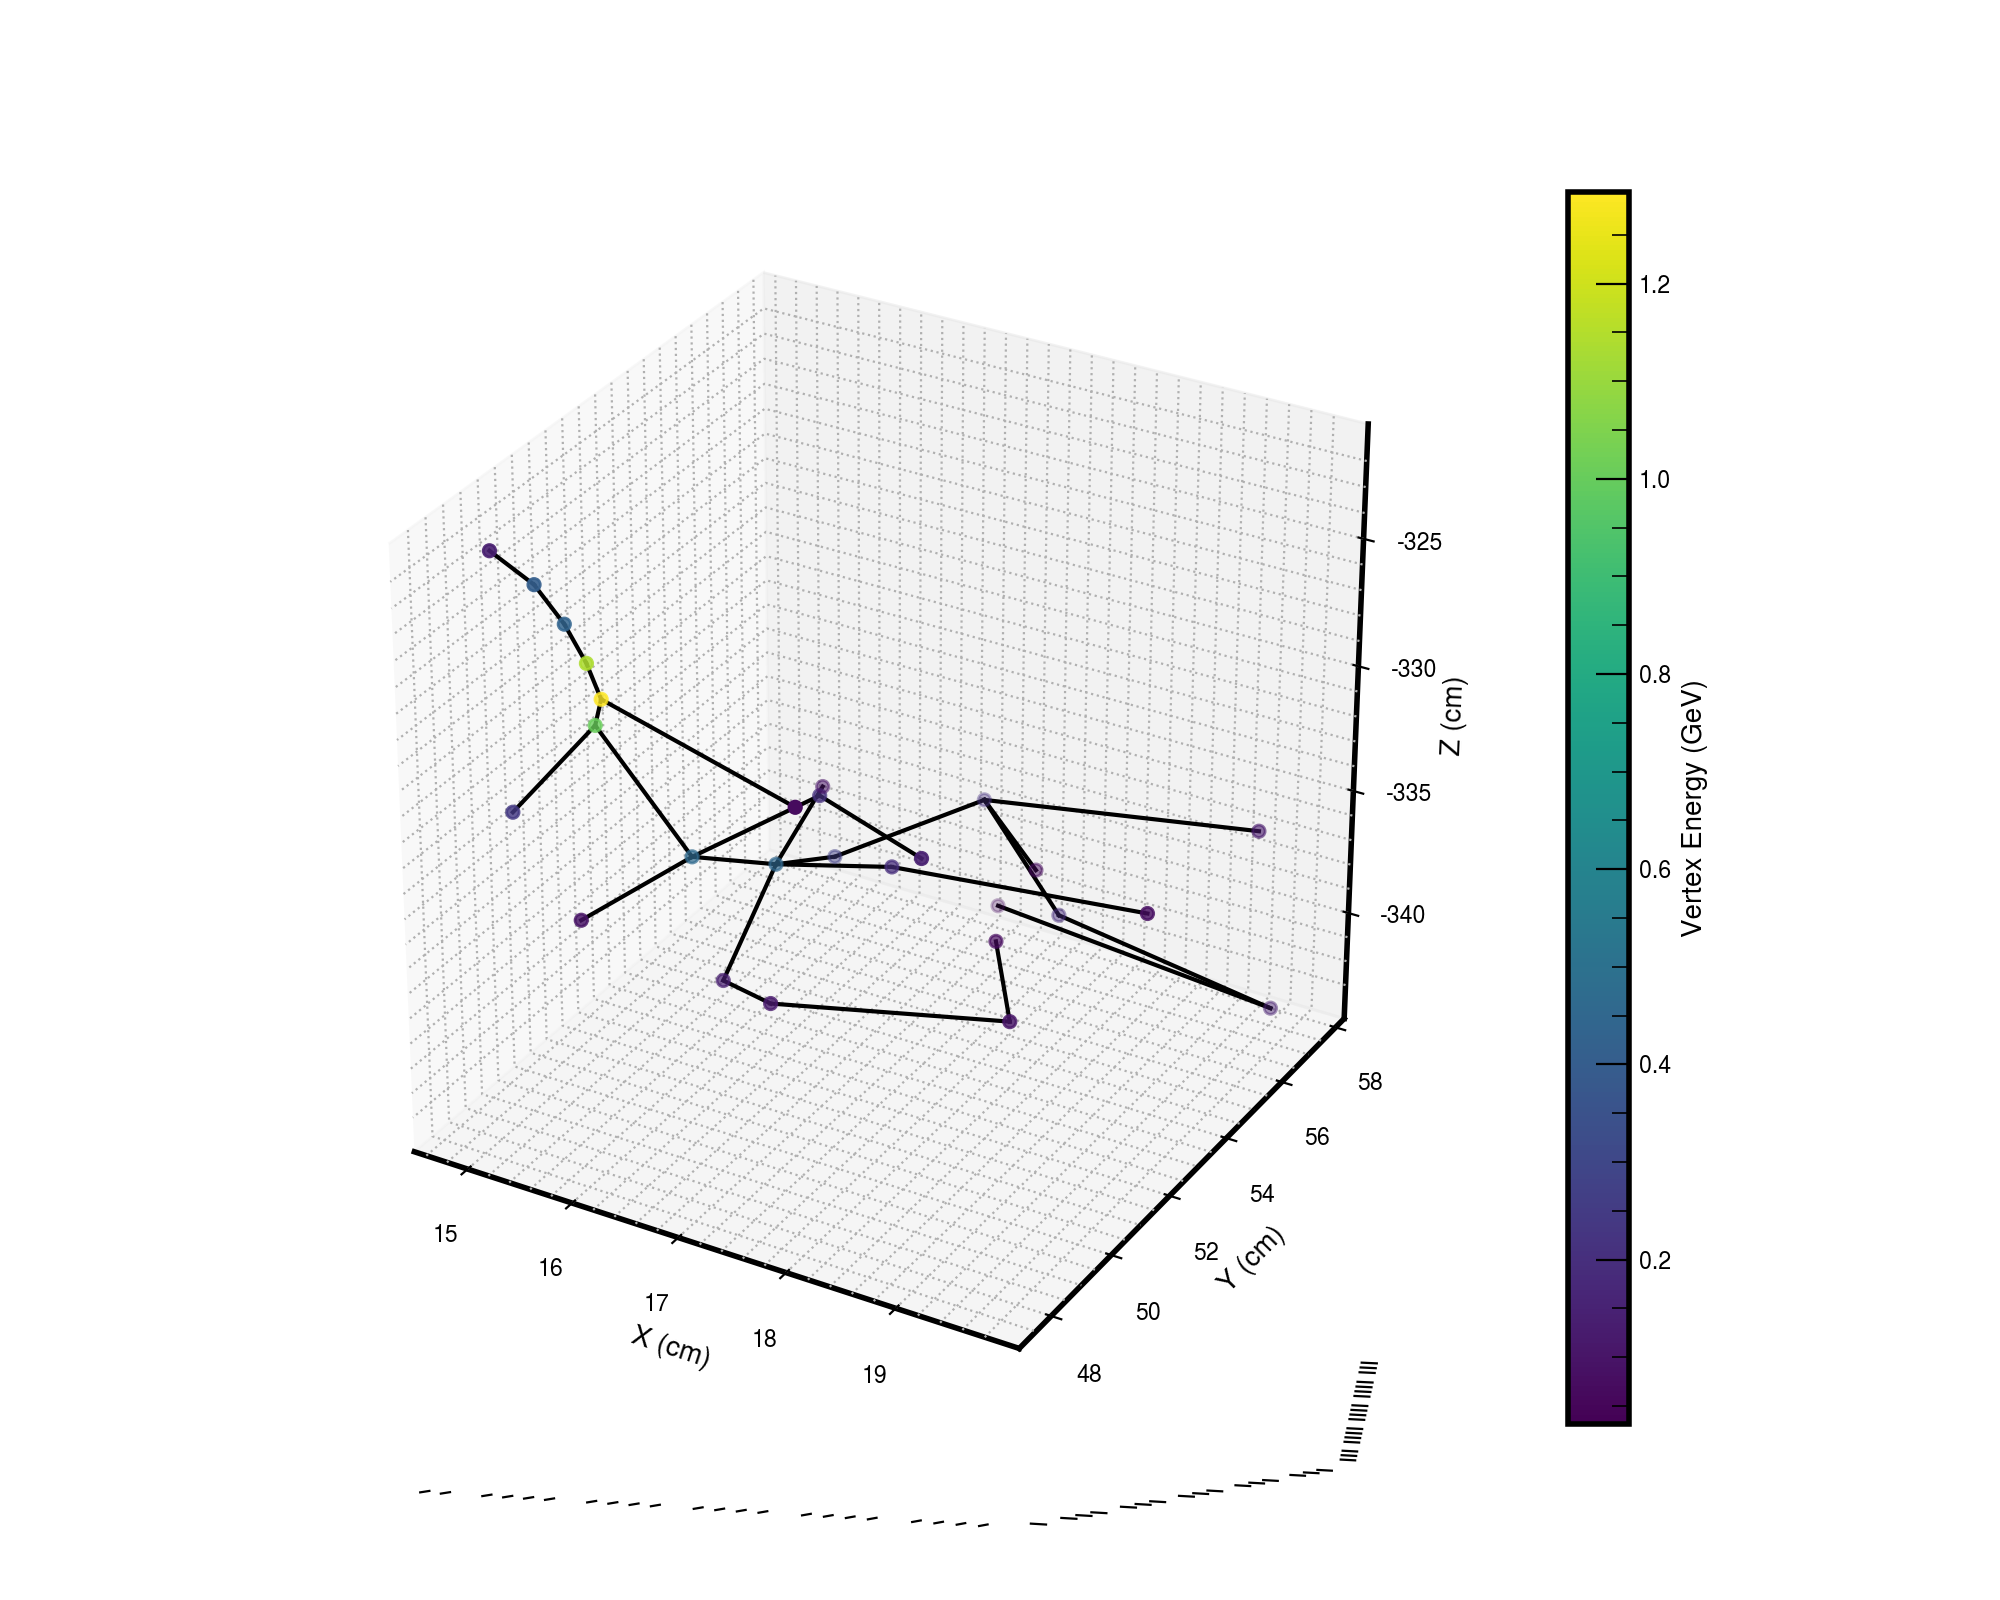

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fn.plotTrackster(
    fig, 
    ax, 
    vertices_x_0[0], 
    vertices_y_0[0], 
    vertices_z_0[0], 
    heatmap=vertices_E_0[0], 
    indexes=vertices_indexes_0[0], 
    edges=edges_0[0], 
    label='Vertex Energy (GeV)'
)

In [9]:
c_eig = fn.nXCentralityEigen(vertices_indexes_0[0],edges_0[0])